## Computer Exercise #05 ##

### Load the Common Imports ###

In [1]:
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
from keras.layers import BatchNormalization

print(keras.__version__)

2.4.3


### Load the Dataset ###

In [2]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)


### Plot a Sample Image ###

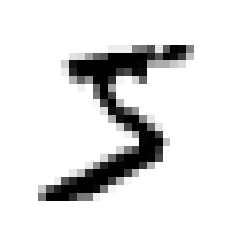

In [3]:
plt.imshow(x_train[0], cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Reshape and Scale the Data ###

In [4]:
# input image dimensions
img_x, img_y = 28, 28
#Reshape the data into a 4d tensor
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train[0].shape)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
()


### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

In [5]:


num_classes = 10 # Number of classes
if y_train[0].shape != ():
    print('Did not increase y_train') #Put this so that data doesnt grow a dim every time it runs
else:
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
x=y_train[0].shape 
print(x)
print(y_train[0])

(10,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### A Simple Example ###

In [6]:
model = Sequential()
model.add(Input(shape=(28,28,)))
model.add(Dense(32,))
model.add(Dense(32))


print(model.summary())







Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 32)            928       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 32)            1056      
Total params: 1,984
Trainable params: 1,984
Non-trainable params: 0
_________________________________________________________________
None


# Discussion -  Shape of Network
The network designed above has 2 dense layers. The output size of the layers is (none,28,32). The layer size is (batch size, size of map). In this case the Batch size is not known until training and each feature map will be 28x32 since each ense layer has 32 Neurons which each output being 28x32. This is true for both layers. This creates a total of 1984 params. Since there is not activation function applied, then no activation is done, ie this is linear and thus the activation looks like a(x) = x. 


### Assignment ###
Construct a network to perform logistic regression on the MNIST dataset

### A More Complicated Model ###

In [7]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### Compile the Model ###

Here is a compilation of a simple model for recognition of images in the MNIST dataset.

In [8]:
# A Simple Model
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Define the Learning Parameters ###

Put in your own numbers.  These are simply placeholders and not necessarily the right numbers to use.  

## MNIST Character Recognition ##
Assignment to design one-hidden layer and two-hidden layer MLPs using different structures, and do the same for CNNs.  See assignment for details

In [33]:
batch_size = 100  # Set the batch size
epochs = 10 # Set the number of epochs

### Train the Model ###

In [44]:
# One Hidden Layer


initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dropout(rate = .5,seed = 7))
model.add(Dense(100, activation='relu',kernel_initializer=None,kernel_constraint=None))
model.add(Dense(num_classes, activation='softmax'))
#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33,
          callbacks=None) #[history])

#
# Print what is in hist.history
#
#print('history contains: ', hist.history)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
402/402 [==============================] - 1s 2ms/step - loss: 0.5915 - accuracy: 0.8224 - val_loss: 0.2744 - val_accuracy: 0.9200
Epoch 2/10
402/402 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8953 - val_loss: 0.2085 - val_accuracy: 0.9406
Epoch 3/10
402/402 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9154 - val_loss: 0.1733 - val_accuracy: 0.9488
Epoch 4/10
402/402 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.9259 - val_loss: 0.1582 - val_accuracy: 0.9520
Epoch 5/10
402/402 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.9340 - val_loss: 0.1428 - val_accuracy: 0.9577
Epoch 6/10
402/402 [==============================] - 1s 2ms/step - loss: 0.1954 - accuracy: 0.9391 - val_loss: 0.1260 - val_accuracy: 0.9625
Epoch 7/10
402/402 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9453 - val_loss: 0.1194 - val_accuracy: 0.9631
Epoch 

# Discussion about One Hidden Layer

The structure is simple, an input layer, then a flatten, then the Dense hidden layer followed by softmax output layer. 

With the single hidden layer the only parameters to play with are the ones of the Dense layer. The activation funtion, bias, kernel initialization, bias initialization, kernel regularizer, and constriaints were some that I exaimed. No significant difference was found for different activation functions, but ReLU seems to be the best. The bias and Initialization seem to only make the system take longer to reach the same CV score, so for that reason I will not be changing any of the initalizer or bias settings moving forward. The most important is the number of Neurons. I started with a small number, 10, and acheived an cv accuracy rate of 92% from 10 epochs. Upping this to 1000 neurons, which decreased the CV accuracy slightly. The big jump in accuracy came with the addition of the ReLu activation function which did not increase accuracy for 10 neurons but upped the 1000 nenurons to 97.3% vladiation. Doubling it to 2000 increases the processing time signicantly but provides little to no benefit. This is a diminishing return and to increase resutls we must look eslewhere.  

# Discussion About Two Hidden Layer

The NN with Two hidden Layers increases the amount of flexibility, but also ups the complexity. Leaving the second layer as a 1000 neuron ReLu layer, which worked well in the first case, the only thing to configure is the first Dense layer. To start I set this to have 10 neurons and with a ReLU activation function. This netted no increase in accuracy with a CV score of about 97.46% after 10 epochs. Getting rid of the activation function lowerd the CV score to 97.2% So it will be used for both layers. 

Upping the neurons in the first layer increased the parameters to be learned from 8 million to 80 million but upped the CV score back to 97.48%, but at 30 minutes training time as opposed to 3 minutes in the single hidden layer case above. Adding a BatchNormalization layer did not seem to help, but did seem to make things worse. The same is true for a dropout layer. A two hidden layer seems like it would need to have many many neuronsto get close to 99% CV score. Two 1000 neuron dense layers might work, but that would take several hours to run, so I am not going to show the results and instead the base line for Hidden layer NN's will be a CV score of 97.48% with a test accuracy of 97.2% 


In [103]:
# Two Hidden Layer


initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)
model = Sequential()
model.add(Input(shape=(28,28,1)))

model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization(axis=3,trainable=True))
model.add(Dense(10, activation='relu'))



model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33,
          callbacks=None) #[history])

#
# Print what is in hist.history
#
#print('history contains: ', hist.history)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
402/402 [==============================] - 47s 117ms/step - loss: 0.3791 - accuracy: 0.8897 - val_loss: 0.5693 - val_accuracy: 0.8716
Epoch 2/10
402/402 [==============================] - 48s 119ms/step - loss: 0.2900 - accuracy: 0.9169 - val_loss: 0.2939 - val_accuracy: 0.9189
Epoch 3/10
402/402 [==============================] - 48s 120ms/step - loss: 0.2708 - accuracy: 0.9231 - val_loss: 0.2974 - val_accuracy: 0.9155
Epoch 4/10
402/402 [==============================] - 50s 126ms/step - loss: 0.2465 - accuracy: 0.9297 - val_loss: 0.2732 - val_accuracy: 0.9278
Epoch 5/10
402/402 [==============================] - 49s 122ms/step - loss: 0.2255 - accuracy: 0.9364 - val_loss: 0.2646 - val_accuracy: 0.9248
Epoch 6/10
402/402 [==============================] - 48s 120ms/step - loss: 0.2078 - accuracy: 0.9386 - val_loss: 0.2656 - val_accuracy: 0.9276
Epoch 7/10
402/402 [==============================] - 47s 118ms/step - loss: 0.1916 - accuracy: 0.9432 - val_loss: 0.2691 - val_ac

In [105]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
batch_normalization_28 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_61 (Flatten)         (None, 2048)            

In [46]:
#CNN



num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(Dropout(rate = .5,seed = 7))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization(axis=3,trainable=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



#
#

In [109]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33,
          callbacks=None) #[history])

#
# Print what is in hist.history
#
#print('history contains: ', hist.history)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
41/41 [==============================] - 45s 1s/step - loss: 0.5888 - accuracy: 0.8553 - val_loss: 1.7602 - val_accuracy: 0.8786
Epoch 2/10
41/41 [==============================] - 46s 1s/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 1.5578 - val_accuracy: 0.9684
Epoch 3/10
41/41 [==============================] - 47s 1s/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 1.3413 - val_accuracy: 0.9777
Epoch 4/10
41/41 [==============================] - 47s 1s/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 1.0685 - val_accuracy: 0.9812
Epoch 5/10
41/41 [==============================] - 47s 1s/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.7784 - val_accuracy: 0.9783
Epoch 6/10
41/41 [==============================] - 47s 1s/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.5102 - val_accuracy: 0.9806
Epoch 7/10
41/41 [==============================] - 47s 1s/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.3566 - val_accuracy: 0.9814
Epoch 8/10
41/41 [==

# Discussion - CNN
The structure of my CNN is as follows: Input layer, 64 filter CNN layer with 5x5 kernal and a stride of 1,1 with RelU activation.  This is immediatly followed by a Drouput layer to turn neurons off with a rate of 50%. 
This goes into a 2x2 max pooler to reduce data which in turn goes into a second Conv layer of 128 neurons but with 5x5 stride and a 5x5 kernel. This output goes into the batch normalization function which is trainable so all of its parameters are trained automatiicly. After normalization, the data is pooled, flattened and set to the 1000 neuron Dense layer and then the output layer. Doing this the CV score was brought up to 98.86% for the finnial epoch with a test accuracy of 99.06%. This is far greater than the more complicated and longer to train Hidden layer methods above, in fact this model has only 2.2 million neurons to train. 

The batch size was fixed to 100 after a couple tests.  The smaller the number the longer the testing takes. At a batch of 10 the CNN took just over 1 minute per epoch, at a batch size of 1000 it took just under 30 seconds. The smaller the batch size, the more batches get run through the model so this is approproate. This also explains why with a smaller batch size the model increases its accuracy slightly 

A Dense layer is a fully connected layer. Atleast one is needed for the output layer that will take all of the previous neuron data and turn it into a softmax output. I use a second Dense layer right before this aswell, although it is not needed, it increases performance.

Batch normalization proved to be very important to my results. It increased my resultus by about 0.5%. But I had to put one only after the second Conv layer or else  It was easy to use aswell, because the parameters were marked as Trainable so that the training algorithm will go through and train the parameters for me. 

A dropout is when neurons are "turned off" at a rate picked by me. This is a method to reduce overfitting and it works so that neurons in one layer dont co-adapt to learn off of a mistake in the previous layer. Reducing these coadaptions reduces complexity which reduces overfitting. 


# Model Summary ###

### Plot Model Accuracy vs Epoch ###

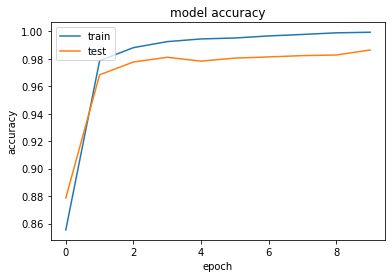

In [110]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Some Predictions ###

In [111]:
#predict first 4 images in the test set
print(y_test[:4])
model.predict(x_test[:4])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[1.8854877e-04, 1.0100864e-03, 1.8137695e-04, 8.1075338e-04,
        1.4034094e-05, 2.6355131e-04, 7.1966620e-06, 9.9515653e-01,
        1.5052402e-04, 2.2175454e-03],
       [1.5398539e-03, 1.1055869e-02, 9.8556006e-01, 3.7293491e-04,
        1.8411743e-05, 3.2753720e-05, 7.0094148e-04, 5.1188479e-05,
        5.9520936e-04, 7.2794865e-05],
       [3.9578456e-04, 9.9598926e-01, 3.3922974e-04, 6.9659742e-05,
        7.7641761e-04, 3.7614917e-04, 2.9640066e-04, 9.1565616e-04,
        5.2868418e-04, 3.1280128e-04],
       [9.7615677e-01, 3.8552002e-04, 1.5464196e-03, 2.1269373e-04,
        3.5607474e-04, 4.9937743e-04, 1.6557656e-02, 4.8000255e-04,
        1.4638560e-03, 2.3416916e-03]], dtype=float32)

## Recognition of CIFAR-10 Images ##

Here you are to design an image recognition system using this dataset.  This dataset may be loaded using the following commands.

In [83]:
from keras.datasets import cifar10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

xtt = np.zeros(50000*32*32*1)
xtt=xtt.reshape(x_train.shape[0], img_x, img_y, 1)
# input image dimensions
img_x, img_y = 32,32
#Reshape the data into a 4d tensor
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 3)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 3)
input_shape = (img_x, img_y, 1)




x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [84]:

# Pre processing
#Only preprocessing step is to make all images grey scale. 

print(x_train.shape)

xtt = np.mean(x_train,axis=3)
xte = np.mean(x_test,axis=3)
x_train=xtt.reshape(50000, img_x, img_y, 1)
x_test=xte.reshape(10000, img_x, img_y, 1)


print(x_train.shape)


# Data is already 255 normalized! dont do anything

#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')


num_classes = 10 # Number of classes
if y_train[0].shape != (1,):
    print('Did not increase y_train') #Put this so that data doesnt grow a dim every time it runs
else:
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
x=y_train[0].shape 
print(x)
print(y_train[0])

(50000, 32, 32, 3)
(50000, 32, 32, 1)
(10,)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [166]:
batch_size = 100  # Set the batch size
epochs = 15 # Set the number of epochs
num_classes=10

# TEST
model = Sequential()
model.add(Input(shape=(32,32,1)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1)))
model.add(Dropout(rate = .01,seed = 7))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(2,2),padding='same'))
model.add(Conv2D(60, kernel_size=(5, 5)))
model.add(Conv2D(70, (7,7), activation='relu'))

model.add(BatchNormalization(axis=3,trainable=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [167]:
# Finial Model
model = Sequential()
model.add(Input(shape=(32,32,1)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Dropout(rate = .01,seed = 7))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(2,2),padding='same'))
model.add(Conv2D(64, (7,7), activation='relu'))

model.add(BatchNormalization(axis=3,trainable=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [168]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33,
          callbacks=None) #[history])



score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
335/335 [==============================] - 33s 98ms/step - loss: 1.4319 - accuracy: 0.5106 - val_loss: 1.7478 - val_accuracy: 0.4730
Epoch 2/15
335/335 [==============================] - 32s 96ms/step - loss: 1.0191 - accuracy: 0.6471 - val_loss: 2.0190 - val_accuracy: 0.4333
Epoch 3/15
335/335 [==============================] - 33s 99ms/step - loss: 0.8511 - accuracy: 0.7052 - val_loss: 1.3041 - val_accuracy: 0.5780
Epoch 4/15
335/335 [==============================] - 33s 100ms/step - loss: 0.7050 - accuracy: 0.7545 - val_loss: 1.4744 - val_accuracy: 0.5700
Epoch 5/15
335/335 [==============================] - 34s 100ms/step - loss: 0.5933 - accuracy: 0.7944 - val_loss: 1.2036 - val_accuracy: 0.6270
Epoch 6/15
335/335 [==============================] - 33s 99ms/step - loss: 0.4795 - accuracy: 0.8331 - val_loss: 1.1673 - val_accuracy: 0.6449
Epoch 7/15
335/335 [==============================] - 34s 100ms/step - loss: 0.3744 - accuracy: 0.8705 - val_loss: 1.2381 - val_accura

In [160]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
dropout_45 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 9, 9, 64)          100416    
_________________________________________________________________
batch_normalization_44 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 1024)            

# Discussion - MNIST-10

The only preprocessing step I did for this data set was to force the data set to be gray scale and thus 1 channel. I tried to use the RGB values and make it 3 channel, but after working through a few itterations I was unable to breka the 50% accuracy mark. 


My Model summary is shown above and I will go over the details of the model first. The model has 2 convolutional layers connected to 2 fully connected layers where the last fully connected layer is a softmax output. The first Conv layer has  a 3x3 kernal with a stride of 1 and a RelU activation. The activation proove nessacary along with the smaller 3x3 size. I initally tried using larger sizes at first, but it was better off for me to use the smaller sizes as idicated by CV scores. Next, the two convolution layers are connected with a dropout layer and a max pooling layer intbeteen. The dropout layer has a low chance (1%) to drop out, I would have expected this to improve results when higher. Having a no dropout or a higher Dropout chance reduces the CV score, so 1% was chosen.  The Max pooling was used in the previous sections so I used the same parameters from above.

This feeds into the second convolutional layer which is 7x7. The larger size cuts down on parameters, increases trianing speed, and increases CV score for a triple sucess. This layer was the hardest to configure. I attempeted may different configuations with the size and number of neurons being formost consideration. I had tired larger numbers thinking that they would prove better, but I found that that was not always true and that using relativily small numbers was best. This also had the benefit of cutting down on parameters. I also expirmented with using more than 2 CNN layers, but after many attempts of trying to get 3,4 or 5 layers I found it impossible to get them to give better results than my simple 2 CNN layer model. This might be possible that since I added more layers the training took longer so to combat this I made all CNN layers smaller in neurons. I did not want processing times to go over 40 minutes for me so that I could make some progress in just a few days that I took to complete the project. 

After the second CNN layer I used a BatchNormalization layer. This was a boon to my accuracy and CV score. Without this layer my resutls were closer to 20% CV score. This layer was easy to use becasue it trained its own parameters, but because of this I did extend the number of Epochs from 10 to 15 that the model had more time to stabilze. The location of the layer mattered a great deal. I could not add a BatchNorm layer after the other CNN, doing so caused harm. I can only theorize that perhaps some small number of batches created extremly weird outpus of the first CNN layer so normalization made other batches have similar defects.

The finial layers were a max_pooling layer configured as above followed by a flatten into the two dense layers that were configued and discussed at length in the first part of this project. 

Doing all of this I was able to get a system with a CV score of 67.23% and a testing accuracy of 67.33%. The training accuracy is 98% so there is clearly overfitting occuring, but the methods I have researched to remove this revolve around more data or other methods that extend processing time. I thought that with the simple nature of my CNN,having just 1.1 million parameters, the results were inspiring. My first step to increase results would be to up the number of Epochs. Going from 10 to 15 with the current model improved accuracy by 7% so at 15 there is still imporovment to be had. It is a time consuming imporovemnt so I did not worry for the purpose of this project. 

